# Clustering Assignment

In [2]:
# Importing Necessary library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans

pd.set_option('display.max_colwidth', -1)

In [3]:
# read Country-data.csv
countries = pd.read_csv('Country-data.csv')
countries.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [4]:
# read data dictionary
data_dict = pd.read_csv('data-dictionary+.csv')
data_dict

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
3,health,Total health spending per capita. Given as %age of GDP per capita
4,imports,Imports of goods and services per capita. Given as %age of the GDP per capita
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


In [5]:
# basics of the df
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
# converting 'income' to float
countries['income'] = countries['income'].astype(float)
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    float64
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 13.2+ KB


In [7]:
# creating absolute values of 'exports', 'imports', 'health'
countries['exports_abs'] = (countries['exports']/100 ) * countries['gdpp']
countries['imports_abs'] = (countries['imports']/100 ) * countries['gdpp']
countries['health_abs'] = (countries['health']/100 ) * countries['gdpp']

# dropping 'exports', 'imports', 'health' --> as now we have their actual values
countries.drop(['exports', 'imports', 'health'], axis = 1, inplace = True)

countries.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_abs,imports_abs,health_abs
0,Afghanistan,90.2,1610.0,9.44,56.2,5.82,553,55.30,248.297,41.9174
1,Albania,16.6,9930.0,4.49,76.3,1.65,4090,1145.20,1987.740,267.8950
2,Algeria,27.3,12900.0,16.10,76.5,2.89,4460,1712.64,1400.440,185.9820
3,Angola,119.0,5900.0,22.40,60.1,6.16,3530,2199.19,1514.370,100.6050
4,Antigua and Barbuda,10.3,19100.0,1.44,76.8,2.13,12200,5551.00,7185.800,735.6600


In [8]:
# df shape
countries.shape

(167, 10)

In [9]:
# df description
countries.describe()

,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_abs,imports_abs,health_abs
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,17144.688623,7.781832,70.555689,2.947964,12964.155689,7420.618847,6588.352108,1056.733204
std,40.328931,19278.067698,10.570704,8.893172,1.513848,18328.704809,17973.885795,14710.810418,1801.408906
min,2.600000,609.000000,-4.210000,32.100000,1.150000,231.000000,1.076920,0.651092,12.821200
25%,8.250000,3355.000000,1.810000,65.300000,1.795000,1330.000000,447.140000,640.215000,78.535500
50%,19.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000,1777.440000,2045.580000,321.886000
75%,62.100000,22800.000000,10.750000,76.800000,3.880000,14050.000000,7278.000000,7719.600000,976.940000
max,208.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000,183750.000000,149100.000000,8663.600000


In [10]:
# check for null vals
countries.isna().sum()

country        0
child_mort     0
income         0
inflation      0
life_expec     0
total_fer      0
gdpp           0
exports_abs    0
imports_abs    0
health_abs     0
dtype: int64

### Performing EDA

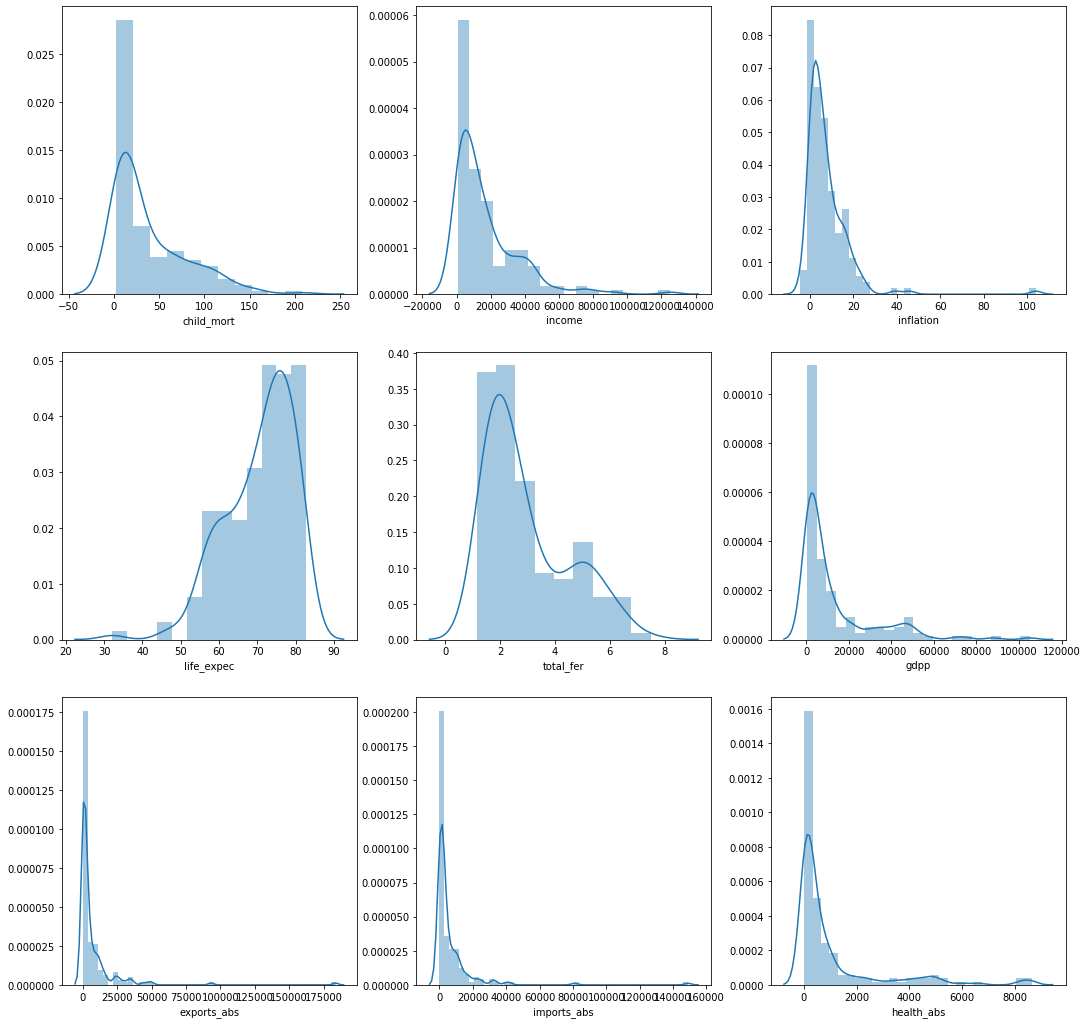

In [11]:
# plotting distplots for all columns
plt.figure(figsize = (18,18))
feature = countries.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.distplot(countries[i[1]])

plt.show()

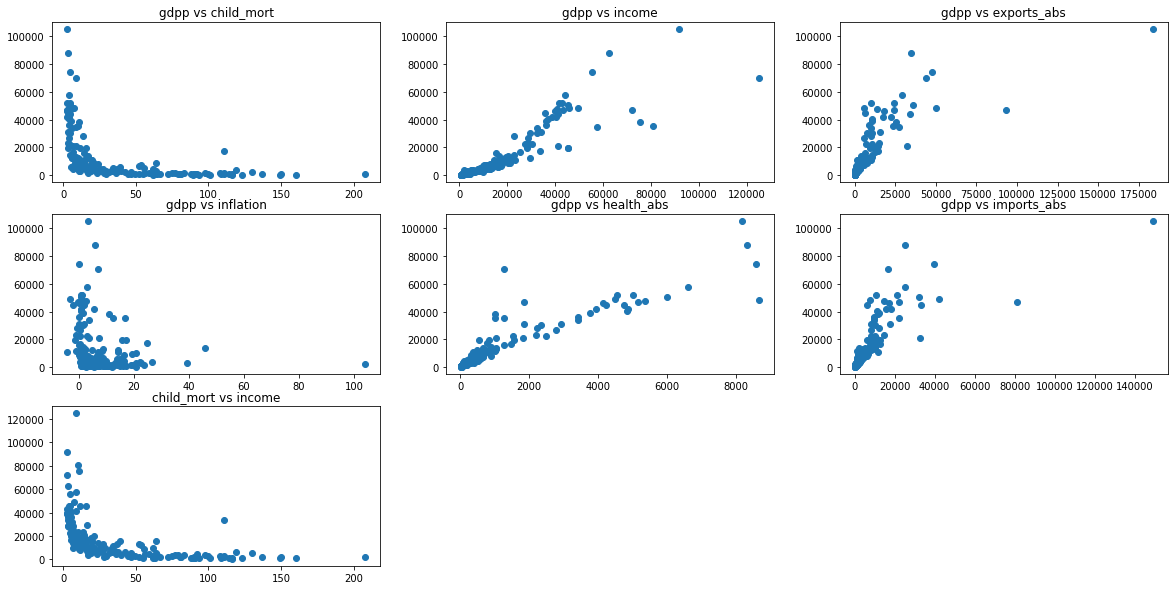

In [12]:
# Plotting scatter plot for variables against 'gdpp'
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
plt.scatter(countries["child_mort"],countries["gdpp"])
plt.title("gdpp vs child_mort")
plt.subplot(3,3,2)
plt.scatter(countries["income"],countries["gdpp"])
plt.title("gdpp vs income")
plt.subplot(3,3,3)
plt.scatter(countries["exports_abs"],countries["gdpp"])
plt.title("gdpp vs exports_abs")
plt.subplot(3,3,4)
plt.scatter(countries["inflation"],countries["gdpp"])
plt.title("gdpp vs inflation")
plt.subplot(3,3,5)
plt.scatter(countries["health_abs"],countries["gdpp"])
plt.title("gdpp vs health_abs")
plt.subplot(3,3,6)
plt.scatter(countries["imports_abs"],countries["gdpp"])
plt.title("gdpp vs imports_abs")
plt.subplot(3,3,7)
plt.scatter(countries["child_mort"],countries["income"])
plt.title("child_mort vs income")
plt.show()

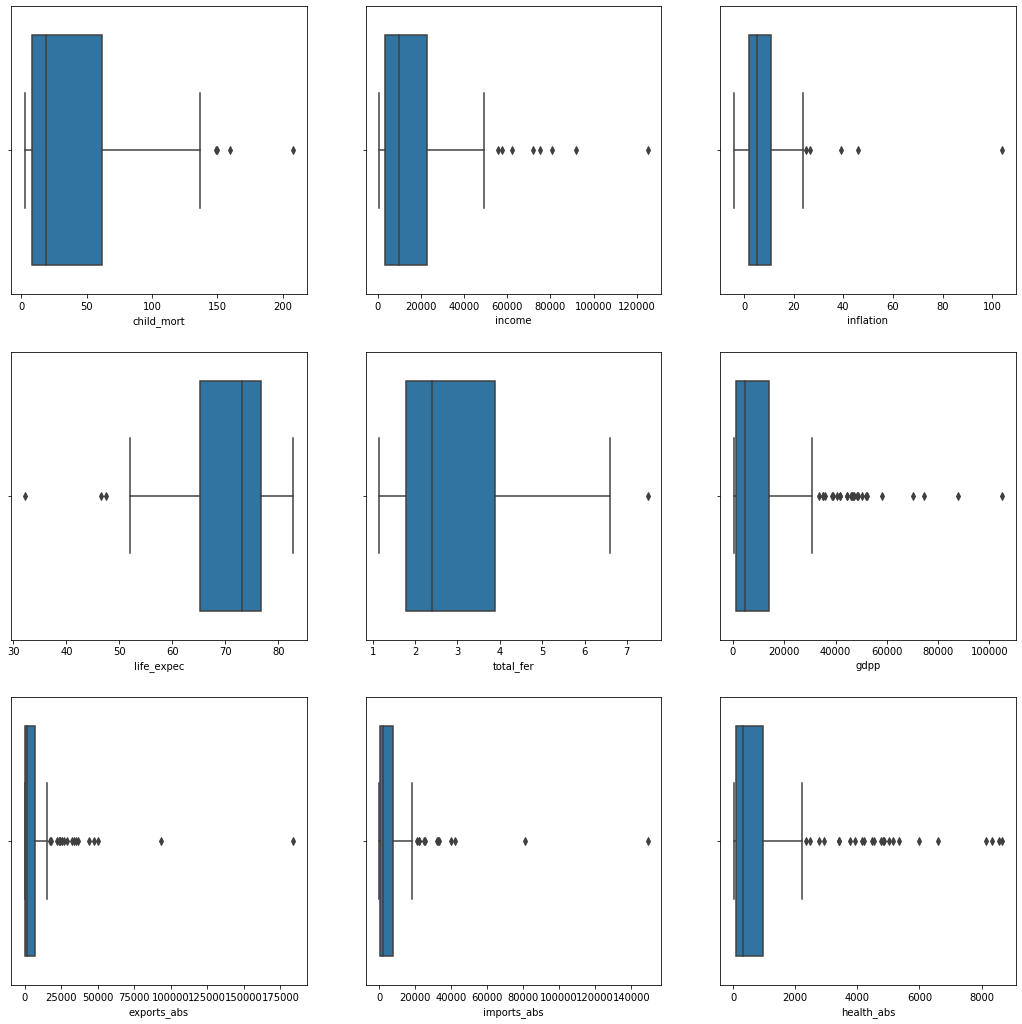

In [13]:
# plotting boxplots
plt.figure(figsize = (18,18))
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(countries[i[1]])
    
plt.show()

- a few columns are expressing a lot number of outliers, like, 'gdpp' & 'income'

### Capping

In [14]:
# Comments:
# Capping the upper outliers of columns: "gdpp", "income", "health_abs", "exports_abs"
# This is because countries with usually high "gdpp", "income" & "health_abs" may be of lower priority for receiving the AID

In [15]:
# Capping "gdpp": mid range
q4 = countries['gdpp'].quantile(0.95)
countries['gdpp'][countries['gdpp']>= q4] = q4

In [16]:
# Capping "income": mid range
q4 = countries['income'].quantile(0.95)
countries['income'][countries['income']>= q4] = q4

In [17]:
# Capping "health_abs": mid range
q4 = countries['health_abs'].quantile(0.95)
countries['health_abs'][countries['health_abs']>= q4] = q4

In [18]:
# Capping "exports_abs": mid range
q4 = countries['exports_abs'].quantile(0.95)
countries['exports_abs'][countries['exports_abs']>= q4] = q4

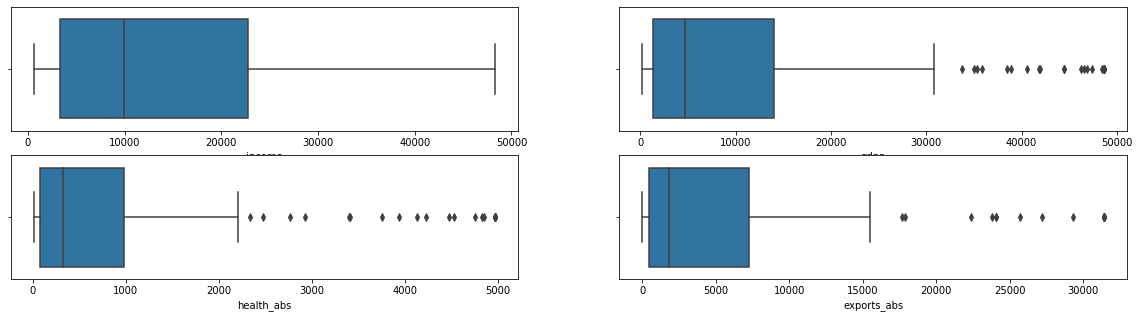

In [19]:
# checking for the change
plt.figure(figsize = (20,5))

plt.subplot(2,2,1)
sns.boxplot(countries["income"])
plt.subplot(2,2,2)
sns.boxplot(countries["gdpp"])
plt.subplot(2,2,3)
sns.boxplot(countries["health_abs"])
plt.subplot(2,2,4)
sns.boxplot(countries["exports_abs"])
plt.show()

### Calculating Hopkins statistic

In [20]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [21]:
hopkins(countries.drop('country', axis = 1))

0.9592678282986945

### Performing Scaling - Standard Scaling

In [22]:
# performing standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std_scaling = scaler.fit_transform(countries.drop('country', axis = 1))

# converting array to df
std_scaling_df= pd.DataFrame(std_scaling, columns = countries.columns[1:])
std_scaling_df.head()

,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_abs,imports_abs,health_abs
0,1.291532,-0.958349,0.157336,-1.619092,1.902882,-0.757362,-0.669581,-0.432276,-0.629435
1,-0.538949,-0.394006,-0.312347,0.647866,-0.859973,-0.523321,-0.542172,-0.313677,-0.473489
2,-0.272833,-0.192552,0.789274,0.670423,-0.038404,-0.498838,-0.475838,-0.353720,-0.530017
3,2.007808,-0.667360,1.387054,-1.179234,2.128151,-0.560376,-0.418960,-0.345953,-0.588935
4,-0.695634,0.227992,-0.601749,0.704258,-0.541946,0.013312,-0.027134,0.040735,-0.150685


## K Means Clustering

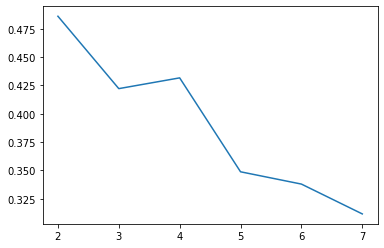

In [23]:
# For K value, we will perform Silhouette Score 
from sklearn.metrics import silhouette_score
sil_score = []
for k in range(2, 8):
    kmean = KMeans(n_clusters = k).fit(std_scaling_df)
    sil_score.append([k, silhouette_score(std_scaling_df, kmean.labels_)])
temp = pd.DataFrame(sil_score)    
plt.plot(temp[0], temp[1])

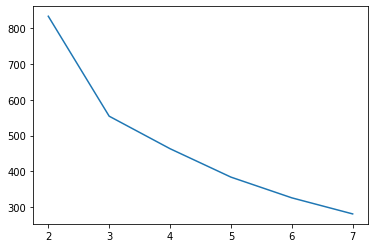

In [24]:
# For K value, we will perform Elbow Curve-ssd
ssd = []
for k in range(2, 8):
    kmean = KMeans(n_clusters = k).fit(std_scaling_df)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
plt.plot(temp[0], temp[1])

In [25]:
# Going with K = 3

In [26]:
kmean = KMeans(n_clusters = 3, random_state = 50)
kmean.fit(std_scaling_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [27]:
# copying countries to "countries_kmean"
countries_kmean = countries.copy()

# creating "label" dataframe
label  = pd.DataFrame(kmean.labels_, columns= ['label'])
label.head()

,label
0,2
1,1
2,1
3,2
4,1


In [28]:
# concatting "countries_kmean" & "label"
countries_kmean = pd.concat([countries_kmean, label], axis =1)
countries_kmean.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_abs,imports_abs,health_abs,label
0,Afghanistan,90.2,1610.0,9.44,56.2,5.82,553,55.30,248.297,41.9174,2
1,Albania,16.6,9930.0,4.49,76.3,1.65,4090,1145.20,1987.740,267.8950,1
2,Algeria,27.3,12900.0,16.10,76.5,2.89,4460,1712.64,1400.440,185.9820,1
3,Angola,119.0,5900.0,22.40,60.1,6.16,3530,2199.19,1514.370,100.6050,2
4,Antigua and Barbuda,10.3,19100.0,1.44,76.8,2.13,12200,5551.00,7185.800,735.6600,1


In [29]:
# Value counts for countries_kmean
countries_kmean.label.value_counts()

1    83
2    48
0    36
Name: label, dtype: int64

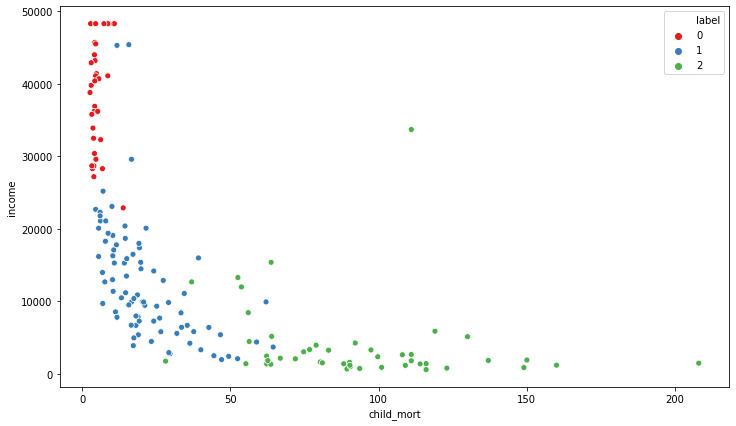

In [30]:
# Plot the cluster - "child_mort" vs "income"
plt.figure(figsize = (12,7))
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'label', data = countries_kmean, palette = 'Set1')
plt.show()

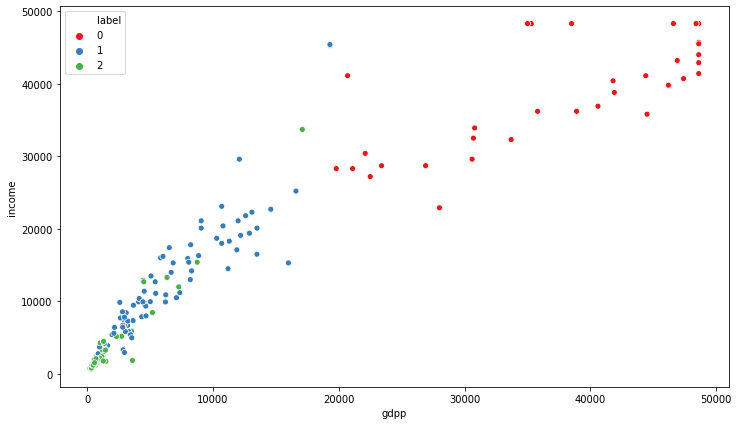

In [31]:
# Plot the cluster - "gdpp" vs "income"
plt.figure(figsize = (12,7))
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'label', data = countries_kmean, palette = 'Set1')
plt.show()

### Cluster Profiling

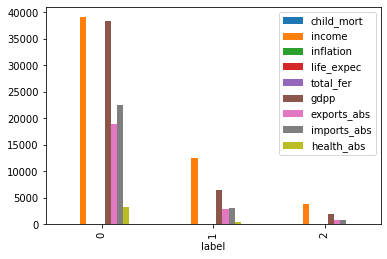

In [32]:
# checking for cluster
countries_kmean.drop('country', axis = 1).groupby('label').mean().plot(kind = 'bar')
plt.show()

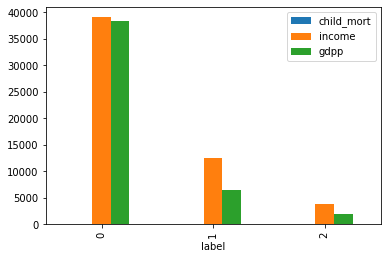

In [33]:
# dropping other columns
countries_kmean.drop(['country', 'inflation', 'life_expec','total_fer','exports_abs', 'imports_abs','health_abs'], axis = 1).groupby('label').mean().plot(kind = 'bar')
plt.show()

In [34]:
# Top 5 countries based on K Means Clustering with LOW 'gdpp', LOW 'income' & HIGH 'child_mort' 
countries_kmean[countries_kmean['label'] == 2].sort_values(by = ['gdpp', 'income', 'child_mort'], ascending = [True, True, False]).head(5)

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_abs,imports_abs,health_abs,label
26,Burundi,93.6,764.0,12.30,57.7,6.26,231,20.6052,90.552,26.7960,2
88,Liberia,89.3,700.0,5.47,60.8,5.02,327,62.4570,302.802,38.5860,2
37,"Congo, Dem. Rep.",116.0,609.0,20.80,57.5,6.54,334,137.2740,165.664,26.4194,2
112,Niger,123.0,814.0,2.55,58.8,7.49,348,77.2560,170.868,17.9568,2
132,Sierra Leone,160.0,1220.0,17.20,55.0,5.20,399,67.0320,137.655,52.2690,2


## Hierarchial Clustering

In [35]:
# necessary imports for hierarchial clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [36]:
# Checking for Scaled data
std_scaling_df.head()

,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_abs,imports_abs,health_abs
0,1.291532,-0.958349,0.157336,-1.619092,1.902882,-0.757362,-0.669581,-0.432276,-0.629435
1,-0.538949,-0.394006,-0.312347,0.647866,-0.859973,-0.523321,-0.542172,-0.313677,-0.473489
2,-0.272833,-0.192552,0.789274,0.670423,-0.038404,-0.498838,-0.475838,-0.353720,-0.530017
3,2.007808,-0.667360,1.387054,-1.179234,2.128151,-0.560376,-0.418960,-0.345953,-0.588935
4,-0.695634,0.227992,-0.601749,0.704258,-0.541946,0.013312,-0.027134,0.040735,-0.150685


In [37]:
# copying 'countries' to 'countries_hrcl'
countries_hrcl = countries.copy()

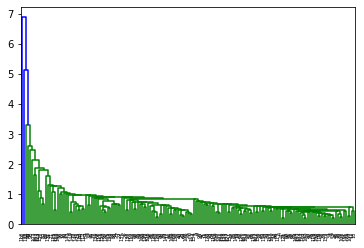

In [38]:
# single linkage
mergings = linkage(std_scaling_df, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

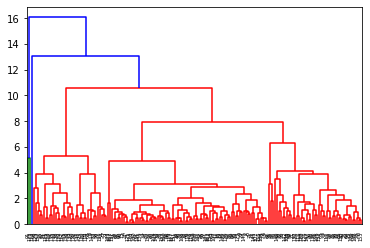

In [39]:
# complete linkage
mergings = linkage(std_scaling_df, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [40]:
# creating 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [41]:
# assign cluster labels
countries_hrcl['cluster_labels'] = cluster_labels
countries_hrcl.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_abs,imports_abs,health_abs,cluster_labels
0,Afghanistan,90.2,1610.0,9.44,56.2,5.82,553,55.30,248.297,41.9174,0
1,Albania,16.6,9930.0,4.49,76.3,1.65,4090,1145.20,1987.740,267.8950,0
2,Algeria,27.3,12900.0,16.10,76.5,2.89,4460,1712.64,1400.440,185.9820,0
3,Angola,119.0,5900.0,22.40,60.1,6.16,3530,2199.19,1514.370,100.6050,0
4,Antigua and Barbuda,10.3,19100.0,1.44,76.8,2.13,12200,5551.00,7185.800,735.6600,0


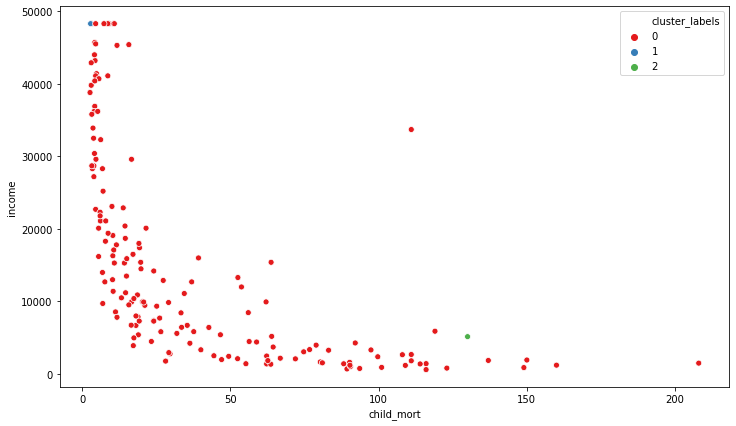

In [42]:
# Plot the cluster - "child_mort" vs "income"
plt.figure(figsize = (12,7))
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'cluster_labels', data = countries_hrcl, palette = 'Set1')
plt.show()

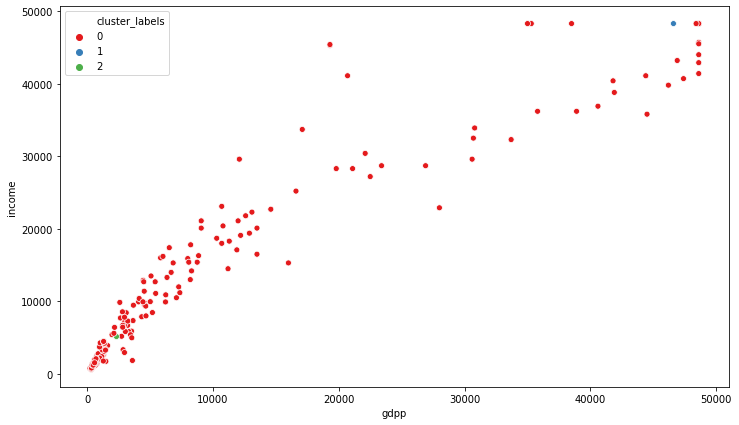

In [43]:
# Plot the cluster - "gdpp" vs "income"
plt.figure(figsize = (12,7))
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'cluster_labels', data = countries_hrcl, palette = 'Set1')
plt.show()

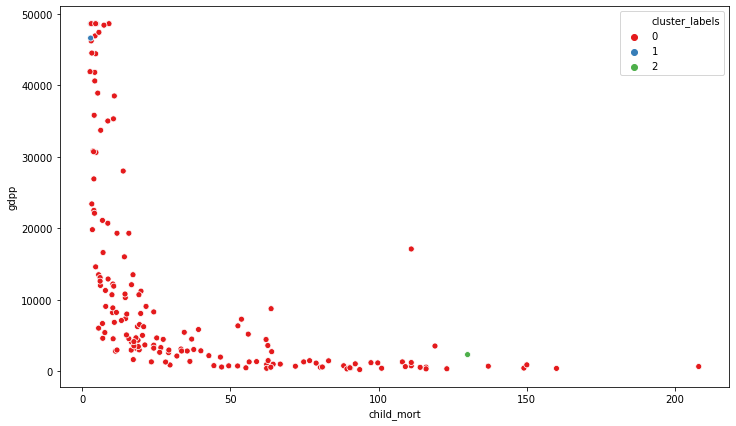

In [44]:
# Plot the cluster - "child_mort" vs "gdpp"
plt.figure(figsize = (12,7))
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'cluster_labels', data = countries_hrcl, palette = 'Set1')
plt.show()

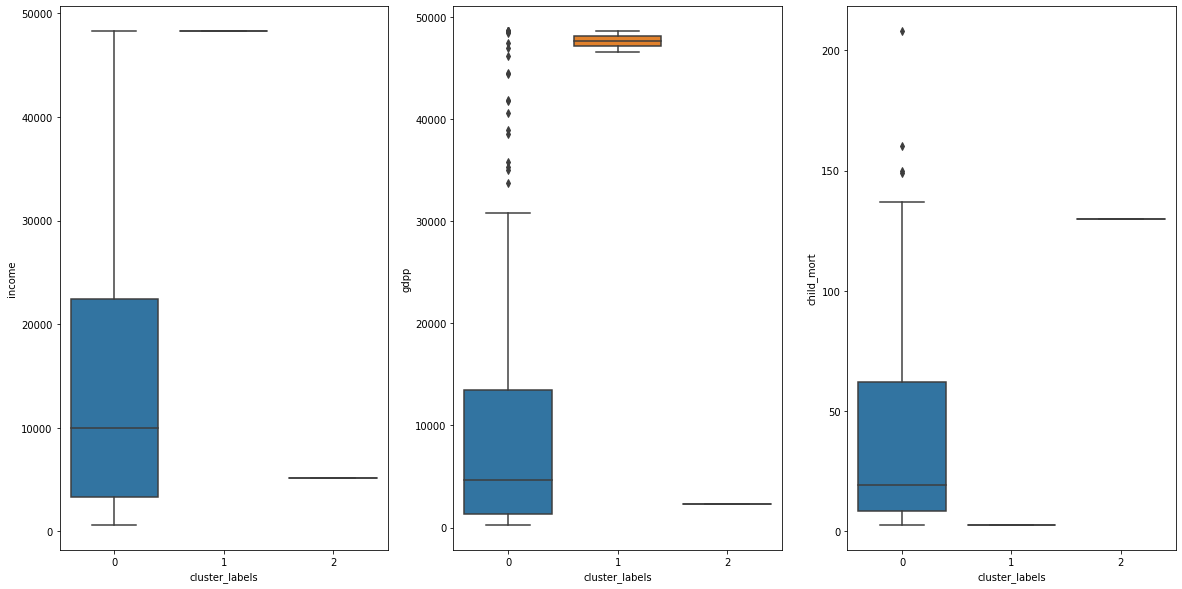

In [45]:
# Plotting cluster
plt.figure(figsize = (20,10))
plt.subplot(1,3,1)
sns.boxplot(x='cluster_labels', y='income', data=countries_hrcl)

plt.subplot(1,3,2)
sns.boxplot(x='cluster_labels', y='gdpp', data=countries_hrcl)

plt.subplot(1,3,3)
sns.boxplot(x='cluster_labels', y='child_mort', data=countries_hrcl)

In [46]:
# As per Label 2: Top 5 countries based on Hierarchial with LOW 'gdpp', LOW 'income' & HIGH 'child_mort' 
countries_hrcl[countries_hrcl['cluster_labels'] == 2].sort_values(by = ['gdpp', 'income', 'child_mort'], ascending = [True, True, False]).head(5)

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_abs,imports_abs,health_abs,cluster_labels
113,Nigeria,130.0,5150.0,104.0,60.5,5.84,2330,589.49,405.42,118.131,2


In [47]:
# Since we have only 1 country with cluster_label = 2, we move to the other 4 countries to cluster_label = 0
countries_hrcl[countries_hrcl['cluster_labels'] == 0].sort_values(by = ['gdpp', 'income', 'child_mort'], ascending = [True, True, False]).head(4)

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_abs,imports_abs,health_abs,cluster_labels
26,Burundi,93.6,764.0,12.30,57.7,6.26,231,20.6052,90.552,26.7960,0
88,Liberia,89.3,700.0,5.47,60.8,5.02,327,62.4570,302.802,38.5860,0
37,"Congo, Dem. Rep.",116.0,609.0,20.80,57.5,6.54,334,137.2740,165.664,26.4194,0
112,Niger,123.0,814.0,2.55,58.8,7.49,348,77.2560,170.868,17.9568,0


## -------------------------------------------------- _CONCLUSION_ --------------------------------------------------

## List of 5 Countries that are in direst need of aid as per K MEANS CLUSTERING
- Burundi	
- Liberia
- Congo, Dem. Rep.
- Niger
- Sierra Leone

## List of 5 Countries that are in direst need of aid as per HIERARCHIAL CLUSTERING
- Nigeria
- Burundi	
- Liberia
- Congo, Dem. Rep.
- Niger
